In [ ]:
# Mounting with Drive

# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Importing Data and Reshaping
import pandas as pd
import numpy as np


# Data_Split
train_x_data = pd.read_csv("/content/drive/My Drive/8th_Sem_Internship/Printed/Aa/X_train.csv")
test_x_data = pd.read_csv("/content/drive/My Drive/8th_Sem_Internship/Printed/Aa/X_test.csv")
train_y_data = pd.read_csv("/content/drive/My Drive/8th_Sem_Internship/Printed/Aa/Y_train.csv")
test_y_data = pd.read_csv("/content/drive/My Drive/8th_Sem_Internship/Printed/Aa/Y_test.csv")

In [6]:
IMG_SIZE = 32
# from PIL import Image as im 
# from matplotlib import pyplot as plt
import cv2 


# X-train
read = train_x_data.iloc[:,:].values
x_train = np.array(read)
x_train = read.reshape(x_train.shape[0],IMG_SIZE,IMG_SIZE,3)

# X-test
read = test_x_data.iloc[:,:].values
x_test = np.array(read)
x_test = read.reshape(x_test.shape[0],IMG_SIZE,IMG_SIZE,3)

# Y-train
read = train_y_data.iloc[:,:].values
y_train = np.array(read)
y_train = read.reshape(y_train.shape[0],)

# Y-test
read = test_y_data.iloc[:,:].values
y_test = np.array(read)
y_test = read.reshape(y_test.shape[0],)

X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
Y_train = y_train.astype('float32')
Y_test = y_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

# print(X_train[2998].shape)
# plt.imshow(X_train[2998], interpolation='nearest')
# plt.show()

print("X-Train Shape : ", X_train.shape)
print("Y-Train Shape : ", Y_train.shape)
print("X-Test Shape : ", X_test.shape)
print("Y-Test Shape : ", Y_test.shape)

X-Train Shape :  (2897, 32, 32, 3)
Y-Train Shape :  (2897,)
X-Test Shape :  (749, 32, 32, 3)
Y-Test Shape :  (749,)


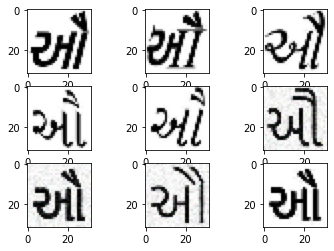

In [7]:
import matplotlib.pyplot as plt

# plot first few images
for i in range(9):
  # define subplot
  plt.subplot(330 + i + 1)
	# plot raw pixel data
  plt.imshow(X_train[i])
# show the figure
plt.show()

In [8]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print(Y_test.shape)

(749, 11)


In [11]:
from keras.layers import ConvLSTM2D, MaxPooling3D, Dense, Flatten, BatchNormalization, Dropout, LSTM, Reshape, Activation
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.models import Sequential

In [12]:
model = Sequential()
model.add(ConvLSTM2D(32, (7, 7), input_shape=X_train.shape, padding='valid', return_sequences=True))
model.add(MaxPooling3D(pool_size=(1,2,2)))
model.add(Dropout(0.2))

model.add(Activation('relu'))
model.add(Dropout(0.5))

out_shape = model.output_shape
# print('====Model shape: ', out_shape)
model.add(Reshape((X_train.shape[0], out_shape[2] * out_shape[3] * out_shape[4])))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))

# model.add(Dense(128, activation='relu'))
model.add(Dense(Y_test.shape[1], activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 2897, 26, 26, 32)  219648    
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 2897, 13, 13, 32)  0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2897, 13, 13, 32)  0         
_________________________________________________________________
activation (Activation)      (None, 2897, 13, 13, 32)  0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2897, 13, 13, 32)  0         
_________________________________________________________________
reshape (Reshape)            (None, 2897, 5408)        0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)               

In [14]:
train_model = model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=2, validation_data=(X_test, Y_test))

Epoch 1/10


ValueError: ignored

In [ ]:
# Calculating Test Accuracy

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print(f'\nTest accuracy: {test_acc*100}')


Test accuracy: 99.93310570716858


In [ ]:
y_pred = model.predict(X_test)
Y_pred = np.argmax(y_pred, 1)

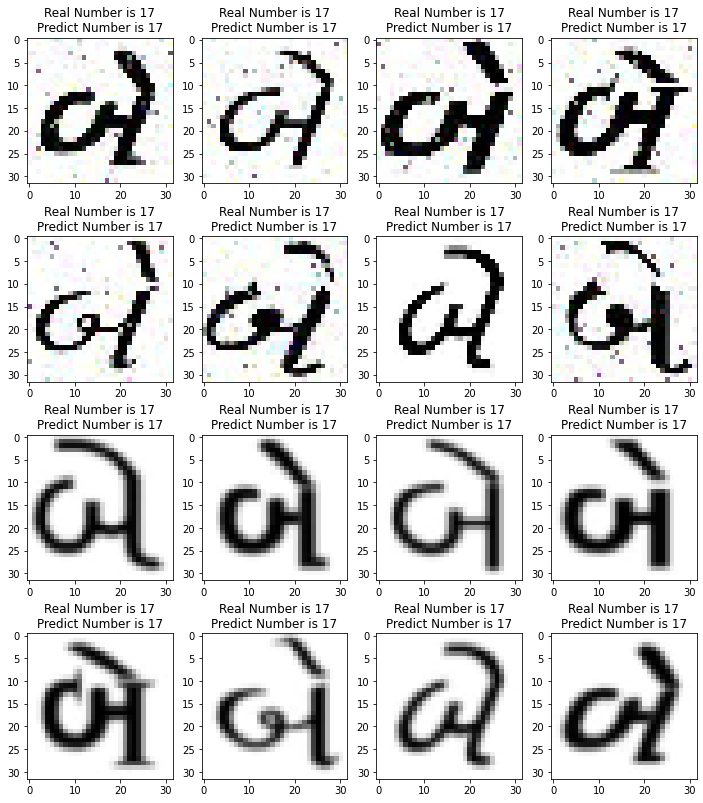

In [ ]:
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
  ax.imshow(X_test[1200 + i], cmap='binary')
  ax.set(title = f"Real Number is {Y_test[1200 + i].argmax()}\nPredict Number is {y_pred[1200 + i].argmax()}");

[167]


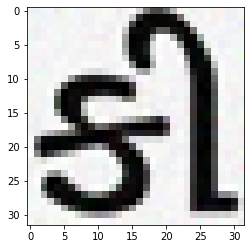

In [ ]:
from PIL import Image as im

example = im.open("/content/drive/My Drive/8th_Sem_Internship/Printed/17.jpg")
image = example.resize((32,32))
value = np.asarray(image.getdata(), dtype=np.int).reshape((-1, 32, 32, 3))

prediction = model.predict(value)
pred = np.argmax(prediction, 1)
print(pred)


value = value.flatten()
new_value = value.reshape(32,32,3)
plt.imshow(new_value)
plt.show()